In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib.gridspec import GridSpec as gs
import time
import pandas as pd

import imaging_behavior.plotting.plotting_functions as pf
import imaging_behavior.plotting.utilities as pu
import imaging_behavior as im

from imaging_behavior.core.session import Session
load_session_from_behavioral_log_file = Session.load_session_from_behavioral_log_file 

# import seaborn as sns
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
# path = r"/Volumes/neuralcoding/Behavior/Data/181424/output"
# files = os.listdir(path)
# for count,f in enumerate(files):
#     session = load_session_from_behavioral_log_file(os.path.join(path,f))
#     if int(session.date.rsplit('-')[1]+session.date.rsplit('-')[2]) > 715:
#         print count,f
#         if count == 0:
#             df = session.df
#         else:
#             print "...concatenating..."
#             df = pd.concat([df,session.df],ignore_index=True)
paths =[#r'\\aibsdata\neuralcoding\Behavior\Data\181423\output\150806105403-181423_contrast_vis_circles_20150806_Foraging-181423.pkl',
        #r'\\aibsdata\neuralcoding\Behavior\Data\181423\output\150807105425-181423_contrast_vis_circles_20150807_Foraging-181423.pkl',
        #r'\\aibsdata\neuralcoding\Behavior\Data\181423\output\150810114831-181423_contrast_vis_circles_201508010_UV-181423.pkl',
        #r'\\aibsdata\neuralcoding\Behavior\Data\181423\output\150811111202-181423_contrast_circles_20150811_VIS-181423.pkl',
        #r'\\aibsdata\neuralcoding\Behavior\Data\181423\output\150812110947-181423_contrast_vis_circles_201508010_UV-181423.pkl',
        #r'\\aibsdata\neuralcoding\Behavior\Data\181423\output\150826105252-181423_contrast_circles_20150826_UV-181423.pkl',
        #r'\\aibsdata\neuralcoding\Behavior\Data\181423\output\150813114621-181423_contrast_circles_20150811_VIS-181423.pkl',
        r'\\aibsdata\neuralcoding\Behavior\Data\181423\output\150819105523-181423_contrast_circles_20150811_VIS-181423.pkl',
        r'\\aibsdata\neuralcoding\Behavior\Data\181423\output\150902105200-181423_contrast_circles_20150901_VIS-181423.pkl',
        r'\\aibsdata\neuralcoding\Behavior\Data\181423\output\150909110102-181423_contrast_circles_20150909_VIS-181423.pkl',
        r'\\aibsdata\neuralcoding\Behavior\Data\181423\output\150910105818-181423_contrast_circles_20150910_UV-181423.pkl',
        r'\\aibsdata\neuralcoding\Behavior\Data\181423\output\150914111447-181423_contrast_circles_20150910_UV-181423.pkl',
        r'\\aibsdata\neuralcoding\Behavior\Data\181423\output\150915105411-181423_contrast_circles_20150911_VIS-181423.pkl',
        r'\\aibsdata\neuralcoding\Behavior\Data\181423\output\150916105224-181423_contrast_circles_20150910_UV-181423.pkl',
        r'\\aibsdata\neuralcoding\Behavior\Data\181423\output\150929111454-181423_contrast_circles_20150918_UV-181423.pkl',
        r'\\aibsdata\neuralcoding\Behavior\Data\181423\output\150930110249-181423_contrast_circles_20150921_VIS-181423.pkl',
        
        #r'\\aibsdata\neuralcoding\Behavior\Data\181424\output\150806094846-181424_contrast_vis_circles_20150806_time-181424.pkl',
        #r'\\aibsdata\neuralcoding\Behavior\Data\181424\output\150807094940-181424_contrast_vis_circles_20150807_time-181424.pkl',
        #r'\\aibsdata\neuralcoding\Behavior\Data\181424\output\150810104313-181424_contrast_vis_circles_201508010_UV-181424.pkl',
        #r'\\aibsdata\neuralcoding\Behavior\Data\181424\output\150811100816-181424_contrast_circles_201508011_VIS-181424.pkl',
        r'\\aibsdata\neuralcoding\Behavior\Data\181424\output\150812100539-181424_contrast_vis_circles_201508010_UV-181424.pkl',
        r'\\aibsdata\neuralcoding\Behavior\Data\181424\output\150813104201-181424_contrast_circles_201508011_VIS-181424.pkl',
        r'\\aibsdata\neuralcoding\Behavior\Data\181424\output\150817100323-181424_contrast_circles_201508011_VIS-181424.pkl',
        r'\\aibsdata\neuralcoding\Behavior\Data\181424\output\150818095205-181424_contrast_vis_circles_201508010_UV-181424.pkl',
        
        r'\\aibsdata\neuralcoding\Behavior\Data\181424\output\150911095526-181424_contrast_circles_20150911_VIS-181424.pkl',
        r'\\aibsdata\neuralcoding\Behavior\Data\181424\output\150914101056-181424_contrast_circles_20150910_UV-181424.pkl',
        r'\\aibsdata\neuralcoding\Behavior\Data\181424\output\150915095044-181424_contrast_circles_20150911_VIS-181424.pkl',
        r'\\aibsdata\neuralcoding\Behavior\Data\181424\output\150916094827-181424_contrast_circles_20150910_UV-181424.pkl',
        r'\\aibsdata\neuralcoding\Behavior\Data\181424\output\150917105914-181424_contrast_circles_20150911_VIS-181424.pkl',
        r'\\aibsdata\neuralcoding\Behavior\Data\181424\output\150918095621-181424_contrast_circles_20150910_UV-181424.pkl',
        r'\\aibsdata\neuralcoding\Behavior\Data\181424\output\150921100038-181424_contrast_circles_20150911_VIS-181424.pkl',
        r'\\aibsdata\neuralcoding\Behavior\Data\181424\output\150923095403-181424_contrast_circles_20150910_UV-181424.pkl',
        r'\\aibsdata\neuralcoding\Behavior\Data\181424\output\150924095916-181424_contrast_circles_20150911_VIS-181424.pkl',
        r'\\aibsdata\neuralcoding\Behavior\Data\181424\output\150928101347-181424_contrast_circles_20150928_VIS-181424.pkl',
        r'\\aibsdata\neuralcoding\Behavior\Data\181424\output\150929101101-181424_contrast_circles_20150910_UV-181424.pkl',
        r'\\aibsdata\neuralcoding\Behavior\Data\181424\output\150930095914-181424_contrast_circles_20150928_VIS-181424.pkl',
       
        #r'\\aibsdata\neuralcoding\Behavior\Data\M154282\output\150413103731-150226094110_cntrst-M154282.pkl',
        #r'\\aibsdata\neuralcoding\Behavior\Data\M154282\output\150413112205-150226094110_cntrst_uv-M154282.pkl',
        #r'\\aibsdata\neuralcoding\Behavior\Data\M154282\output\150414092927-150226094110_cntrst_uv-M154282.pkl',
        #r'\\aibsdata\neuralcoding\Behavior\Data\M154282\output\150414101024-150226094110_cntrst-M154282.pkl',
        # #'150415100059-150226094110_cntrst_uv-M154282.pkl',
        #r'\\aibsdata\neuralcoding\Behavior\Data\M154282\output\150415105857-150226094110_cntrst-M154282.pkl',
        #r'\\aibsdata\neuralcoding\Behavior\Data\M154282\output\150415114356-150226094110_cntrst_uv-M154282.pkl',
        #r'\\aibsdata\neuralcoding\Behavior\Data\M154282\output\150427114730-150226094110_cntrst_uv-M154282.pkl',
       ]

for count,path in enumerate(paths):
    session = load_session_from_behavioral_log_file(os.path.join(path))
    if count == 0:
        df = session.df
    else:
        print "...concatenating..."
        df = pd.concat([df,session.df],ignore_index=True)
    

...concatenating...
...concatenating...
...concatenating...
...concatenating...
...concatenating...
...concatenating...
...concatenating...
...concatenating...
...concatenating...
...concatenating...
...concatenating...
...concatenating...
...concatenating...
...concatenating...
...concatenating...
...concatenating...
...concatenating...
...concatenating...
...concatenating...
...concatenating...
...concatenating...
...concatenating...
...concatenating...
...concatenating...


C:\WinPython-64bit-2.7.6.3\python-2.7.6.amd64\lib\site-packages\imaging_behavior\core\session.py:73: UserWarning: Display lag not set
  warnings.warn("Display lag not set")


In [3]:
blue = [102/255.,153/255.,204/255.]

In [5]:
def plotPsycho(df,ax,linecolor='k',title='',zerocontrast= {'RT_RW_mean': 0.2, 'RT_RW_std': 0.2, 'CI': (0.2, 0.05), 'N': 17, 'RT_all_mean': 0.0, 'RT_all_std': 0.0, 'prob': 0.0}):
    # fig,ax=plt.subplots()
    contrasts = list(np.sort(df.Contrast.unique()))
    performance = []
    if 0.0 in contrasts:
        contrasts.remove(0.0)
    for contrast in contrasts:
        licks = pu.getLicks(df,contrast=contrast,getPrevious = False)
        data = pu.parseLicks(licks)
        performance.append(data)  
    
    z = [0.0];z.extend(contrasts);contrasts = z;#print contrasts
    temp = [zerocontrast];temp.extend(performance);performance=temp;#print performance
    
    
    ax,l,l_err,l_fit,p=pf.plotPsychometric(ax=ax,x=contrasts,y=[d['prob'] for d in performance],CI=[d['CI'] for d in performance],logscale=True,linecolor=linecolor,returnvals=True)
    ax.set_title(title)
    return l_fit#pu.getThreshold(p)

def getLicks_2(data,parameter,value,getPrevious = True):
    '''
    Takes a session object or dataframe with columns for parameter and licktimes, returns a list of lists of licktimes for the input value of parameter
    getPrevious will include lick times from the previous trial also
    data is dataframe
    parameter is a string which is a key in data
    value is one of the values of parameter
    getPrevious is a boolean
    '''
    if type(data) != pd.DataFrame:
        df = data.df
    else:
        df = data

    if 'licktimes' in df.columns:
        licks = list(df[(df[parameter]==value)]['licktimes'])
    elif 'lick_times' in df.columns:
        if getPrevious == True:
            idx = np.where(np.array(df[parameter]==value)==True)[0]
            licks = []
            for ii in idx:
                if ii == 0:
                    licks.append(df.lick_times[ii] - df.start_time[ii])
                else:
                    licks.append(np.hstack((df.lick_times[ii-1],df.lick_times[ii])) - df.start_time[ii])
        else:
            licks = list(df[(df[parameter]==value)].lick_times - df[(df[parameter]==value)].start_time)

    return licks

def plotBar(x,y,**kwargs):
    '''
    Uses the psychometric plotting function in psy to make a psychometric curve with a fit
    '''

    ax = kwargs.get('ax', defaults['ax'])
    ylabel = kwargs.get('ylabel','Respone Probability')
    title = kwargs.get('title',defaults['title'])
    linecolor = kwargs.get('linecolor',defaults['linecolor'])
    linewidth = kwargs.get('linewidth',defaults['linewidth'])
    linestyle = kwargs.get('linestyle','-')
    fontsize = kwargs.get('fontsize',defaults['fontsize'])
    yerr = kwargs.get('yerr',None)
    CI = kwargs.get('CI',None)
    logscale = kwargs.get('logscale',False)
    marker = kwargs.get('marker','o')
    markersize = kwargs.get('markersize',9)
    fittype = kwargs.get('fittype','Weibull')
    returnvals = kwargs.get('returnvals',False)

    xlabel = kwargs.get('xlabel','Contrast')

    # turn confidence intervals into lower and upper errors
    if CI is not None:
        lerr = []
        uerr = []
        for i in range(len(x)):
            lerr.append(y[i]-CI[i][0])
            uerr.append(CI[i][1]-y[i])
        yerr = [lerr,uerr]

    if ax == None:
        fig, ax = plt.subplots(1, 1)
    
    xvals = np.arange(float(len(x)))
    y = np.float64(y)

    l = ax.bar(xvals - 0.4,y,color=linecolor,yerr=yerr)
#     try:
#         # Plot error bars
#         if 'yerr' is not None:
#             # Plot error on data points
#             if logscale == False:
#                 (l_err, caps, _)  = ax.errorbar(x,y,markersize=markersize,yerr=yerr,color=linecolor,linestyle='None')
#             else:
#                 (l_err, caps, _)  = ax.errorbar(np.log10(x),y,markersize=markersize,yerr=yerr,color=linecolor,linestyle='None')
#             for cap in caps:
#                 cap.set_markeredgewidth(0)
#                 cap.set_linewidth(2)
#         else:
#             l_err = 'None'
#     except Exception,e:
#         print "failed to add error bars",e

    ax.set_xlim([np.min(xvals)-0.8,np.max(xvals)+.8])
    ax.set_xticks(xvals)
    ax.set_xticklabels(x)

    ax.set_ylim([-0.05,1.05])
    ax.set_xlabel(xlabel,fontsize=fontsize)
    ax.set_ylabel(ylabel,fontsize=fontsize)
    plt.tick_params(labelsize=fontsize-1)

    if returnvals == True:
        return ax,l#,l_err,l_fit,p
    else:
        return ax

defaults = {'ax':None,
        'xlabel':'',
        'ylabel':'',
        'title':'',
        'linecolor':'k',
        'linewidth':2,
        'fontsize':10}

In [6]:
df.shape

(5213, 22)

In [7]:
false_alarm_licks = pu.parseLicks(getLicks_2(df,'Contrast',0.0,getPrevious = False))
false_alarm_licks2 = pu.parseLicks(getLicks_2(df,'PosY',280,getPrevious = False))
false_alarm_licks3 = pu.parseLicks(getLicks_2(df,'PosY',-300,getPrevious = False))
#data = pu.parseLicks(false_alarm_licks)

In [8]:
print false_alarm_licks
print false_alarm_licks2
print false_alarm_licks3

{'RT_RW_mean': 0.40334314258644705, 'RT_RW_std': 0.25862771013103336, 'CI': (0.15774200500828212, 0.27452324615747925), 'N': 203, 'RT_all_mean': 2.3528324351037897, 'RT_all_std': 2.1715301459866283, 'prob': 0.21182266009852216}
{'RT_RW_mean': 0.44552841242828972, 'RT_RW_std': 0.26553698709159002, 'CI': (0.11185502592440187, 0.23459044555051112), 'N': 156, 'RT_all_mean': 2.4834987384362552, 'RT_all_std': 2.2299700323173113, 'prob': 0.16666666666666666}
{'RT_RW_mean': 0.40878016423938646, 'RT_RW_std': 0.26462034460912298, 'CI': (0.15533806842638706, 0.28744525949936728), 'N': 162, 'RT_all_mean': 2.3349102757135913, 'RT_all_std': 2.1146188263300165, 'prob': 0.21604938271604937}


green
uv


C:\WinPython-64bit-2.7.6.3\python-2.7.6.amd64\lib\site-packages\numpy\core\_methods.py:55: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
C:\WinPython-64bit-2.7.6.3\python-2.7.6.amd64\lib\site-packages\numpy\core\_methods.py:77: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)


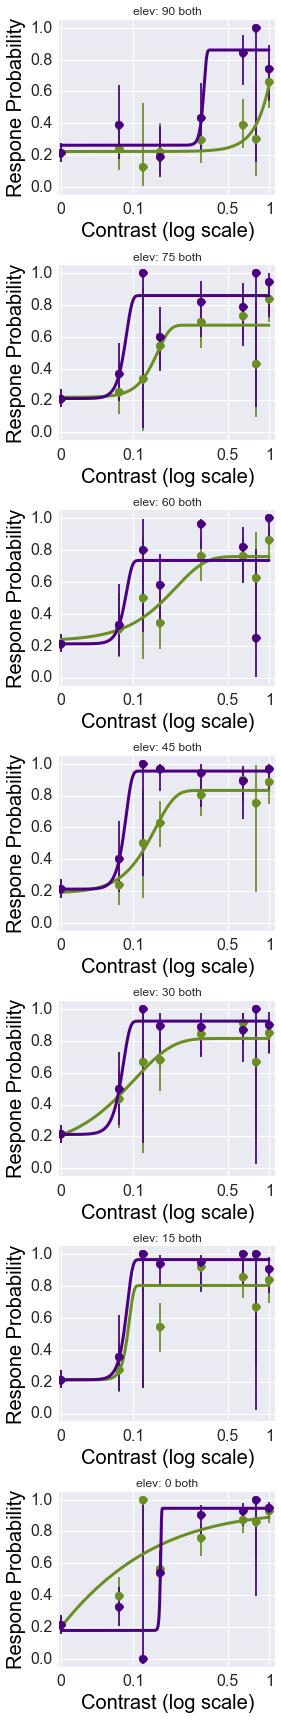

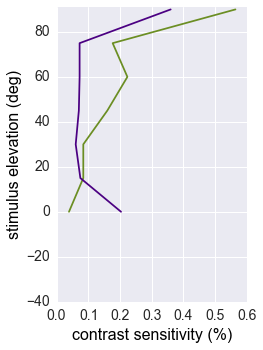

In [9]:
import seaborn as sns
fig,ax = plt.subplots(7,1,figsize=(4,24))
colors = [[(0,1,0),(0,-1,0)],[(0,0,1),(0,0,-1)]]
threshes = np.zeros((7,2))
for column,Color in enumerate(colors):
    color = Color
    loc2 = pd.concat([df[(df.PosY == 230) & (df.Color == Color[0])],df[(df.PosY == -240) &  (df.Color == Color[1])]],ignore_index=True) 
    loc3 = pd.concat([df[(df.PosY == 200) & (df.Color == Color[0]) ],df[(df.PosY == -210) &  (df.Color == Color[1])]],ignore_index=True) 
    loc4 = pd.concat([df[(df.PosY == 160) & (df.Color == Color[0] )],df[(df.PosY == -180) & (df.Color == Color[1])]],ignore_index=True) 
    loc5 = pd.concat([df[(df.PosY == 120) & (df.Color == Color[0] )],df[(df.PosY == -150) &  (df.Color == Color[1])]],ignore_index=True) 
    loc6 = pd.concat([df[(df.PosY == 80) & (df.Color == Color[0] )],df[(df.PosY == -120) &  (df.Color == Color[1])]],ignore_index=True) 
    loc7 = pd.concat([df[(df.PosY == 40) & (df.Color == Color[0] )],df[(df.PosY == -60) &  (df.Color == Color[1])]],ignore_index=True) 
    loc8 =  pd.concat([df[(df.PosY == 0) & (df.Color == Color[0] )],df[(df.PosY == 0) & (df.Color == Color[1])]],ignore_index=True)

    if Color == [(0,0,1),(0,0,-1)]:
        print 'uv'
        c = '#4B0082'
    if Color == [(0,1,0),(0,-1,0)]:
        print 'green'
        c = '#6B8E23'
        
    lum = 'both'
    a=plotPsycho(loc2,ax[0],c,title='elev: 90 '+lum,zerocontrast=false_alarm_licks)
    threshes[0][column]= a[0].get_data()[0][np.where(a[0].get_data()[1] > np.min(a[0].get_data()[1])+(np.max(a[0].get_data()[1]) - np.min(a[0].get_data()[1]))/2.)[0]][0]
    a=plotPsycho(loc3,ax[1],c,title='elev: 75 '+lum,zerocontrast=false_alarm_licks)
    threshes[1][column]= a[0].get_data()[0][np.where(a[0].get_data()[1] > np.min(a[0].get_data()[1])+(np.max(a[0].get_data()[1]) - np.min(a[0].get_data()[1]))/2.)[0]][0]
    a=plotPsycho(loc4,ax[2],c,title='elev: 60 '+lum,zerocontrast=false_alarm_licks)
    threshes[2][column]= a[0].get_data()[0][np.where(a[0].get_data()[1] > np.min(a[0].get_data()[1])+(np.max(a[0].get_data()[1]) - np.min(a[0].get_data()[1]))/2.)[0]][0]
    a=plotPsycho(loc5,ax[3],c,title='elev: 45 '+lum,zerocontrast=false_alarm_licks)
    threshes[3][column]= a[0].get_data()[0][np.where(a[0].get_data()[1] > np.min(a[0].get_data()[1])+(np.max(a[0].get_data()[1]) - np.min(a[0].get_data()[1]))/2.)[0]][0]
    a=plotPsycho(loc6,ax[4],c,title='elev: 30 '+lum,zerocontrast=false_alarm_licks)
    threshes[4][column]= a[0].get_data()[0][np.where(a[0].get_data()[1] > np.min(a[0].get_data()[1])+(np.max(a[0].get_data()[1]) - np.min(a[0].get_data()[1]))/2.)[0]][0]
    a=plotPsycho(loc7,ax[5],c,title='elev: 15 '+lum,zerocontrast=false_alarm_licks)
    threshes[5][column]= a[0].get_data()[0][np.where(a[0].get_data()[1] > np.min(a[0].get_data()[1])+(np.max(a[0].get_data()[1]) - np.min(a[0].get_data()[1]))/2.)[0]][0]
    a=plotPsycho(loc8,ax[6],c,title='elev: 0 '+lum,zerocontrast=false_alarm_licks)
    threshes[6][column]= a[0].get_data()[0][np.where(a[0].get_data()[1] > np.min(a[0].get_data()[1])+(np.max(a[0].get_data()[1]) - np.min(a[0].get_data()[1]))/2.)[0]][0]

    for axis in ax:
        axis.tick_params(axis='both', which='major', labelsize=16)
        axis.xaxis.label.set_fontsize(20)
        axis.yaxis.label.set_fontsize(20)
    
    plt.tight_layout()
    f=plt.gcf()
    #f.savefig(r'C:\Users\danield\Dropbox\allenTransfer\notebooks\behavior\elev_combined.png',format='png')#,dpi=300)
    for axis in ax:
        axis.tick_params(axis='both', which='major', labelsize=16)
        axis.xaxis.label.set_fontsize(20)
        axis.yaxis.label.set_fontsize(20)
    
    plt.tight_layout()
    f=plt.gcf()
    #f.savefig(r'C:\Users\danield\Dropbox\allenTransfer\notebooks\behavior\elev_combined.png',format='png')#,dpi=300)

elevations = np.array([90,75,60,45,30,15,0])    
plt.figure(figsize=(3.77,4.97))
plt.plot(threshes[:,0]/2.+.6 ,elevations,color='#6B8E23')
plt.plot(threshes[:,1]/2.+.6 ,elevations,color='#4B0082')
plt.ylim(-40,91)
#plt.xlim(0,1)
plt.xlabel('contrast sensitivity (%)',size=16)
plt.ylabel('stimulus elevation (deg)',size=16)
plt.gca().tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()
f=plt.gcf()
#f.savefig(r'C:\Users\danield\Dropbox\allenTransfer\notebooks\behavior\elev_combined_summary.png',format='png')#,dpi=300)

In [ ]:
plt.figure(figsize=(3.77,4.97))
plt.plot(threshes[:,0]/2.+.6 ,elevations,color='#6B8E23')
plt.plot(threshes[:,1]/2.+.6 ,elevations,color='#4B0082')
plt.ylim(-10,91)
#plt.xlim(0,1)
plt.xlabel('contrast sensitivity (%)',size=16)
plt.ylabel('stimulus elevation (deg)',size=16)
plt.gca().tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()
f=plt.gcf()

In [6]:
all_df = df
df_1 = df[:250]
df_2 = df[250:]

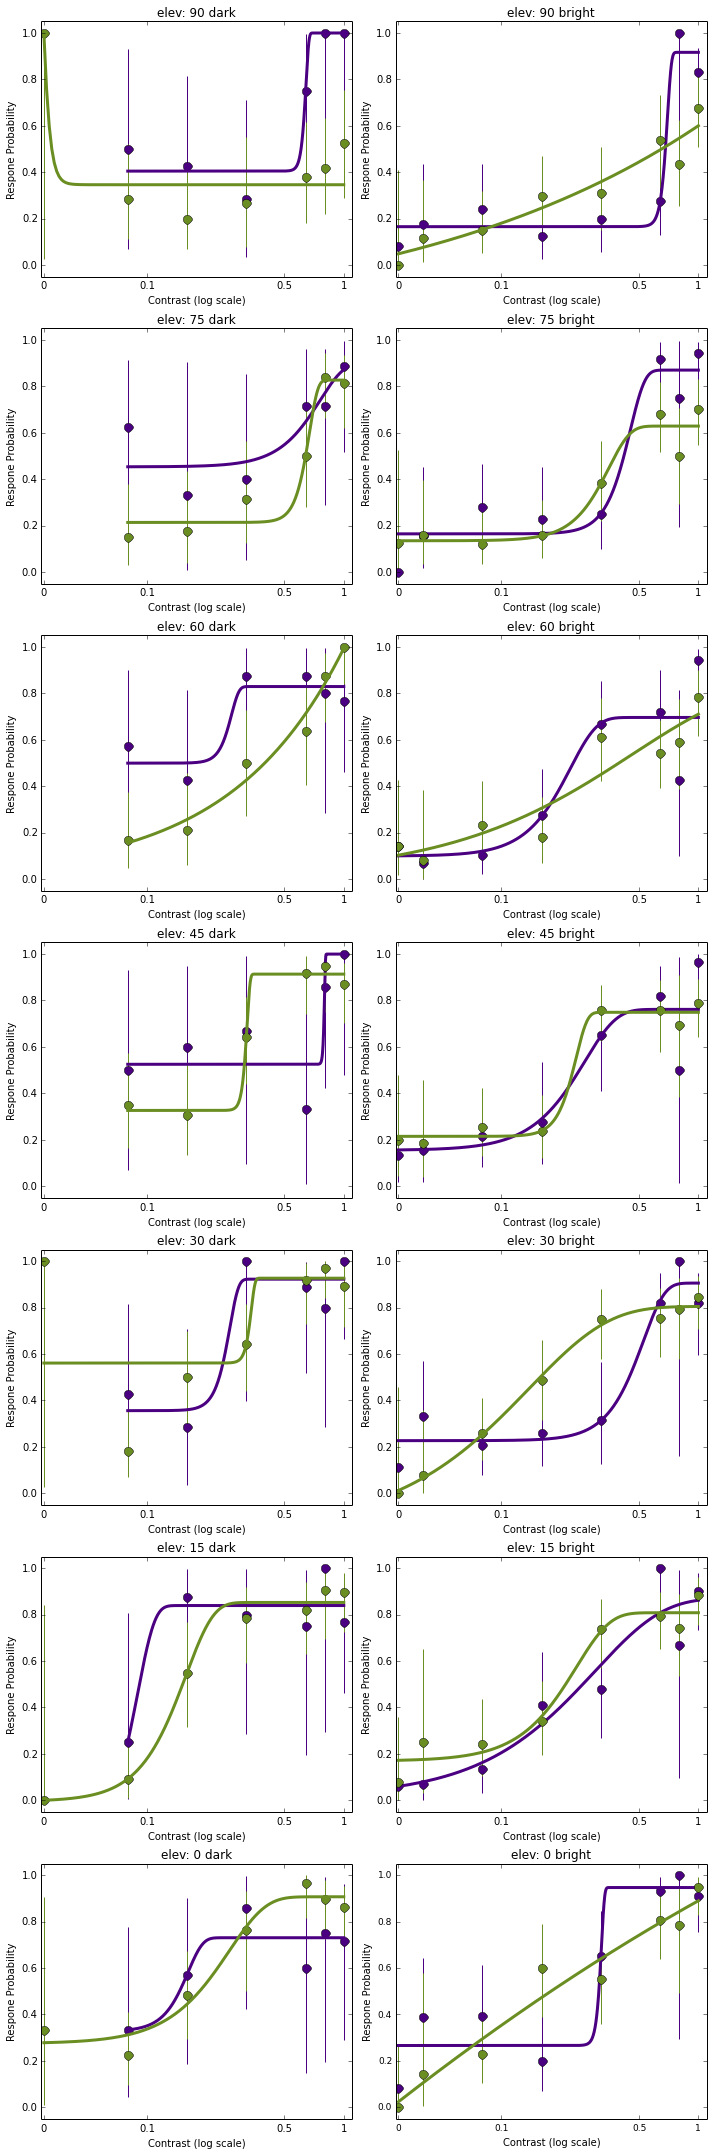

In [11]:
fig,ax = plt.subplots(7,2,figsize=(10,30))
colors = [(0,0,-1),(0,0,1)]
for column,Color in enumerate(colors):

    loc2 = pd.concat([df[(df.PosY == 230) & (df.Color == Color)],df[(df.PosY == -240) & (df.Color == Color)]],ignore_index=True) 
    loc3 = pd.concat([df[(df.PosY == 200) & (df.Color == Color)],df[(df.PosY == -210) & (df.Color == Color)]],ignore_index=True) 
    loc4 = pd.concat([df[(df.PosY == 160) & (df.Color == Color)],df[(df.PosY == -180) & (df.Color == Color)]],ignore_index=True) 
    loc5 = pd.concat([df[(df.PosY == 120) & (df.Color == Color)],df[(df.PosY == -150) & (df.Color == Color)]],ignore_index=True) 
    loc6 = pd.concat([df[(df.PosY == 80) & (df.Color == Color)],df[(df.PosY == -120) & (df.Color == Color)]],ignore_index=True) 
    loc7 = pd.concat([df[(df.PosY == 40) & (df.Color == Color)],df[(df.PosY == -60) & (df.Color == Color)]],ignore_index=True) 
    loc8 = df[(df.PosY == 0) & (df.Color == Color)]

    #loc3 = df[((df.PosY == 200) or(df.PosY == -210))& (df.Color == Color)]
    #loc4 = df[((df.PosY == 160) or(df.PosY == -180))& (df.Color == Color)]
    #loc5 = df[((df.PosY == 120)or(df.PosY == -150)) & (df.Color == Color)]
    #loc6 = df[((df.PosY == 80) or(df.PosY == -120))& (df.Color == Color)]
    #loc7 = df[((df.PosY == 40) or(df.PosY == -60))& (df.Color == Color)]
    #loc8 = df[(df.PosY == 0) & (df.Color == Color)]

    if Color == (0,0,-1) or Color == (0,0,1):
        c = '#4B0082'
    if Color == (0,-1,0) or Color == (0,1,0):
        c = '#6B8E23'
        
    if Color[1]+Color[2] > 0:
        lum = 'bright'
    if Color[1]+Color[2] < 0:
        lum = 'dark'
        
    plotPsycho(loc2,ax[0][column],c,title='elev: 90 '+lum)
    plotPsycho(loc3,ax[1][column],c,title='elev: 75 '+lum)
    plotPsycho(loc4,ax[2][column],c,title='elev: 60 '+lum)
    plotPsycho(loc5,ax[3][column],c,title='elev: 45 '+lum)
    plotPsycho(loc6,ax[4][column],c,title='elev: 30 '+lum)
    plotPsycho(loc7,ax[5][column],c,title='elev: 15 '+lum)
    plotPsycho(loc8,ax[6][column],c,title='elev: 0 '+lum)
    
    plt.tight_layout()

colors = [(0,-1,0),(0,1,0)]
for column,Color in enumerate(colors):

    loc2 = pd.concat([df[(df.PosY == 230) & (df.Color == Color)],df[(df.PosY == -240) & (df.Color == Color)]],ignore_index=True) 
    loc3 = pd.concat([df[(df.PosY == 200) & (df.Color == Color)],df[(df.PosY == -210) & (df.Color == Color)]],ignore_index=True) 
    loc4 = pd.concat([df[(df.PosY == 160) & (df.Color == Color)],df[(df.PosY == -180) & (df.Color == Color)]],ignore_index=True) 
    loc5 = pd.concat([df[(df.PosY == 120) & (df.Color == Color)],df[(df.PosY == -150) & (df.Color == Color)]],ignore_index=True) 
    loc6 = pd.concat([df[(df.PosY == 80) & (df.Color == Color)],df[(df.PosY == -120) & (df.Color == Color)]],ignore_index=True) 
    loc7 = pd.concat([df[(df.PosY == 40) & (df.Color == Color)],df[(df.PosY == -60) & (df.Color == Color)]],ignore_index=True) 
    loc8 = df[(df.PosY == 0) & (df.Color == Color)]

    if Color == (0,0,-1) or Color == (0,0,1):
        c = '#4B0082'
    if Color == (0,-1,0) or Color == (0,1,0):
        c = '#6B8E23'
        
    if Color[1]+Color[2] > 0:
        lum = 'bright'
    if Color[1]+Color[2] < 0:
        lum = 'dark'
        
    plotPsycho(loc2,ax[0][column],c,title='elev: 90 '+lum)
    plotPsycho(loc3,ax[1][column],c,title='elev: 75 '+lum)
    plotPsycho(loc4,ax[2][column],c,title='elev: 60 '+lum)
    plotPsycho(loc5,ax[3][column],c,title='elev: 45 '+lum)
    plotPsycho(loc6,ax[4][column],c,title='elev: 30 '+lum)
    plotPsycho(loc7,ax[5][column],c,title='elev: 15 '+lum)
    plotPsycho(loc8,ax[6][column],c,title='elev: 0 '+lum)
    
    plt.tight_layout()

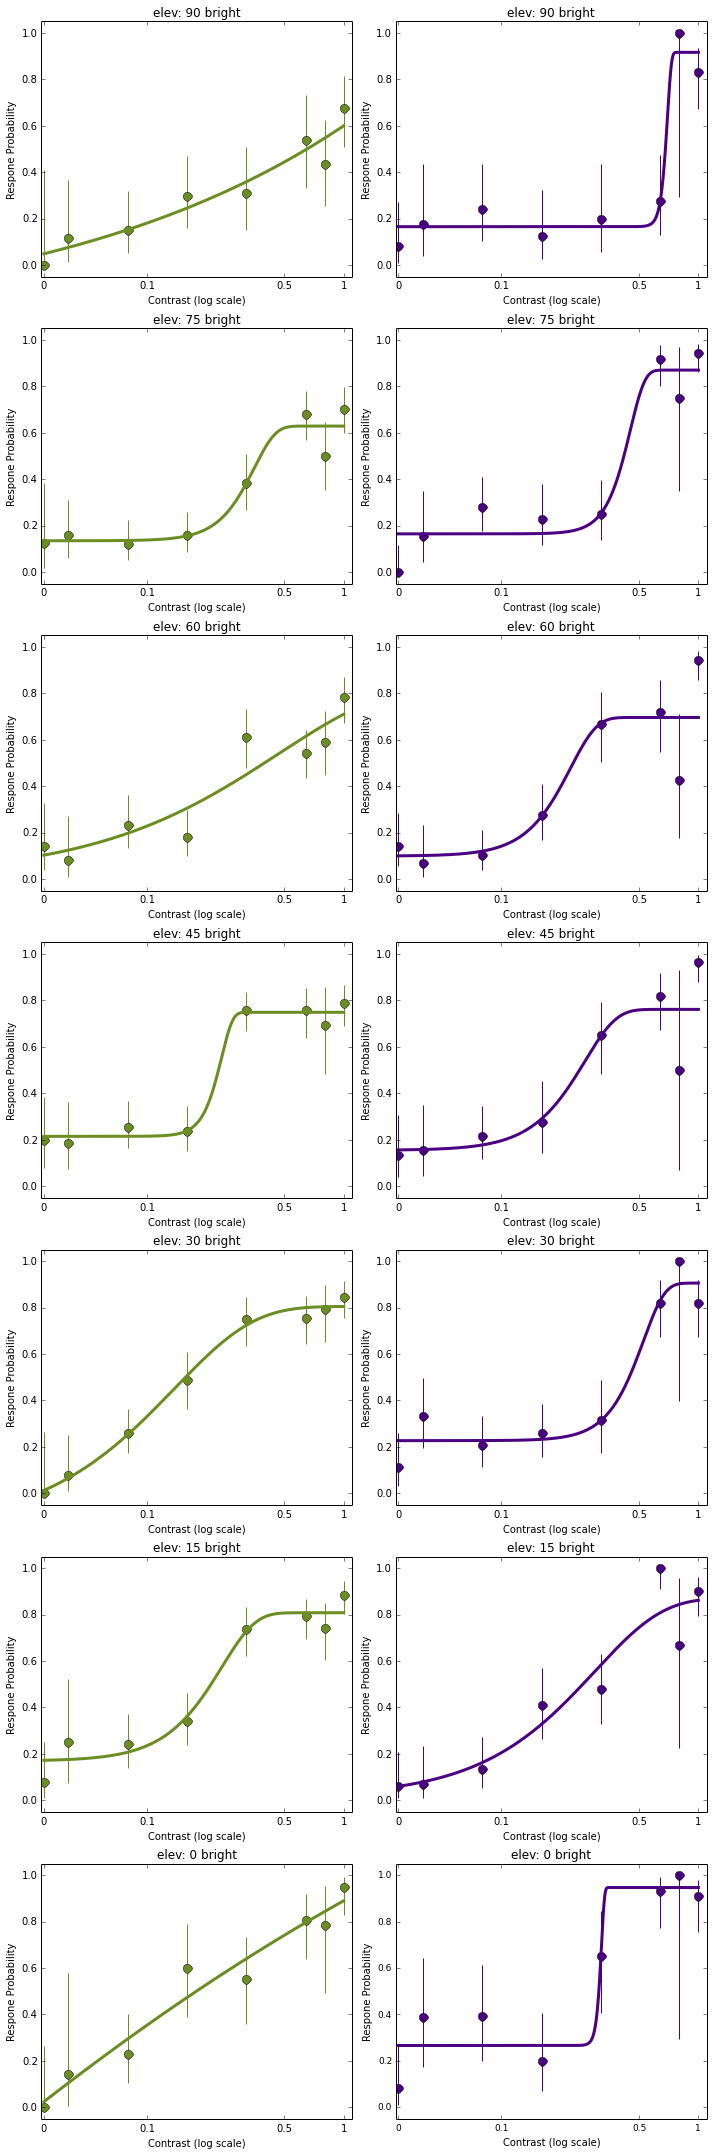

In [12]:
fig,ax = plt.subplots(7,2,figsize=(10,30))
colors = [(0,1,0),(0,0,1)]
for column,Color in enumerate(colors):

    loc2 = pd.concat([df[(df.PosY == 230) & (df.Color == Color)],df[(df.PosY == -240) & (df.Color == Color)],df[(df.PosY == 230) & (df.Color == Color*-1)],df[(df.PosY == -240) & (df.Color == Color*-1)]],ignore_index=True) 
    loc3 = pd.concat([df[(df.PosY == 200) & (df.Color == Color)],df[(df.PosY == -210) & (df.Color == Color)],df[(df.PosY == 200) & (df.Color == Color)],df[(df.PosY == -210) & (df.Color == Color)]],ignore_index=True) 
    loc4 = pd.concat([df[(df.PosY == 160) & (df.Color == Color)],df[(df.PosY == -180) & (df.Color == Color)],df[(df.PosY == 160) & (df.Color == Color)],df[(df.PosY == -180) & (df.Color == Color)]],ignore_index=True) 
    loc5 = pd.concat([df[(df.PosY == 120) & (df.Color == Color)],df[(df.PosY == -150) & (df.Color == Color)],df[(df.PosY == 120) & (df.Color == Color)],df[(df.PosY == -150) & (df.Color == Color)]],ignore_index=True) 
    loc6 = pd.concat([df[(df.PosY == 80) & (df.Color == Color)],df[(df.PosY == -120) & (df.Color == Color)],df[(df.PosY == 80) & (df.Color == Color)],df[(df.PosY == -120) & (df.Color == Color)],],ignore_index=True) 
    loc7 = pd.concat([df[(df.PosY == 40) & (df.Color == Color)],df[(df.PosY == -60) & (df.Color == Color)],df[(df.PosY == 40) & (df.Color == Color)],df[(df.PosY == -60) & (df.Color == Color)]],ignore_index=True) 
    loc8 =  pd.concat([df[(df.PosY == 0) & (df.Color == Color)],df[(df.PosY == 0) & (df.Color == Color*-1)]])

    #loc3 = df[((df.PosY == 200) or(df.PosY == -210))& (df.Color == Color)]
    #loc4 = df[((df.PosY == 160) or(df.PosY == -180))& (df.Color == Color)]
    #loc5 = df[((df.PosY == 120)or(df.PosY == -150)) & (df.Color == Color)]
    #loc6 = df[((df.PosY == 80) or(df.PosY == -120))& (df.Color == Color)]
    #loc7 = df[((df.PosY == 40) or(df.PosY == -60))& (df.Color == Color)]
    #loc8 = df[(df.PosY == 0) & (df.Color == Color)]

    if Color == (0,0,-1) or Color == (0,0,1):
        c = '#4B0082'
    if Color == (0,-1,0) or Color == (0,1,0):
        c = '#6B8E23'
        
    if Color[1]+Color[2] > 0:
        lum = 'bright'
    if Color[1]+Color[2] < 0:
        lum = 'dark'
        
    plotPsycho(loc2,ax[0][column],c,title='elev: 90 '+lum,zerocontrast=false_alarm_licks)
    plotPsycho(loc3,ax[1][column],c,title='elev: 75 '+lum)
    plotPsycho(loc4,ax[2][column],c,title='elev: 60 '+lum)
    plotPsycho(loc5,ax[3][column],c,title='elev: 45 '+lum)
    plotPsycho(loc6,ax[4][column],c,title='elev: 30 '+lum)
    plotPsycho(loc7,ax[5][column],c,title='elev: 15 '+lum)
    plotPsycho(loc8,ax[6][column],c,title='elev: 0 '+lum)
    
    plt.tight_layout()


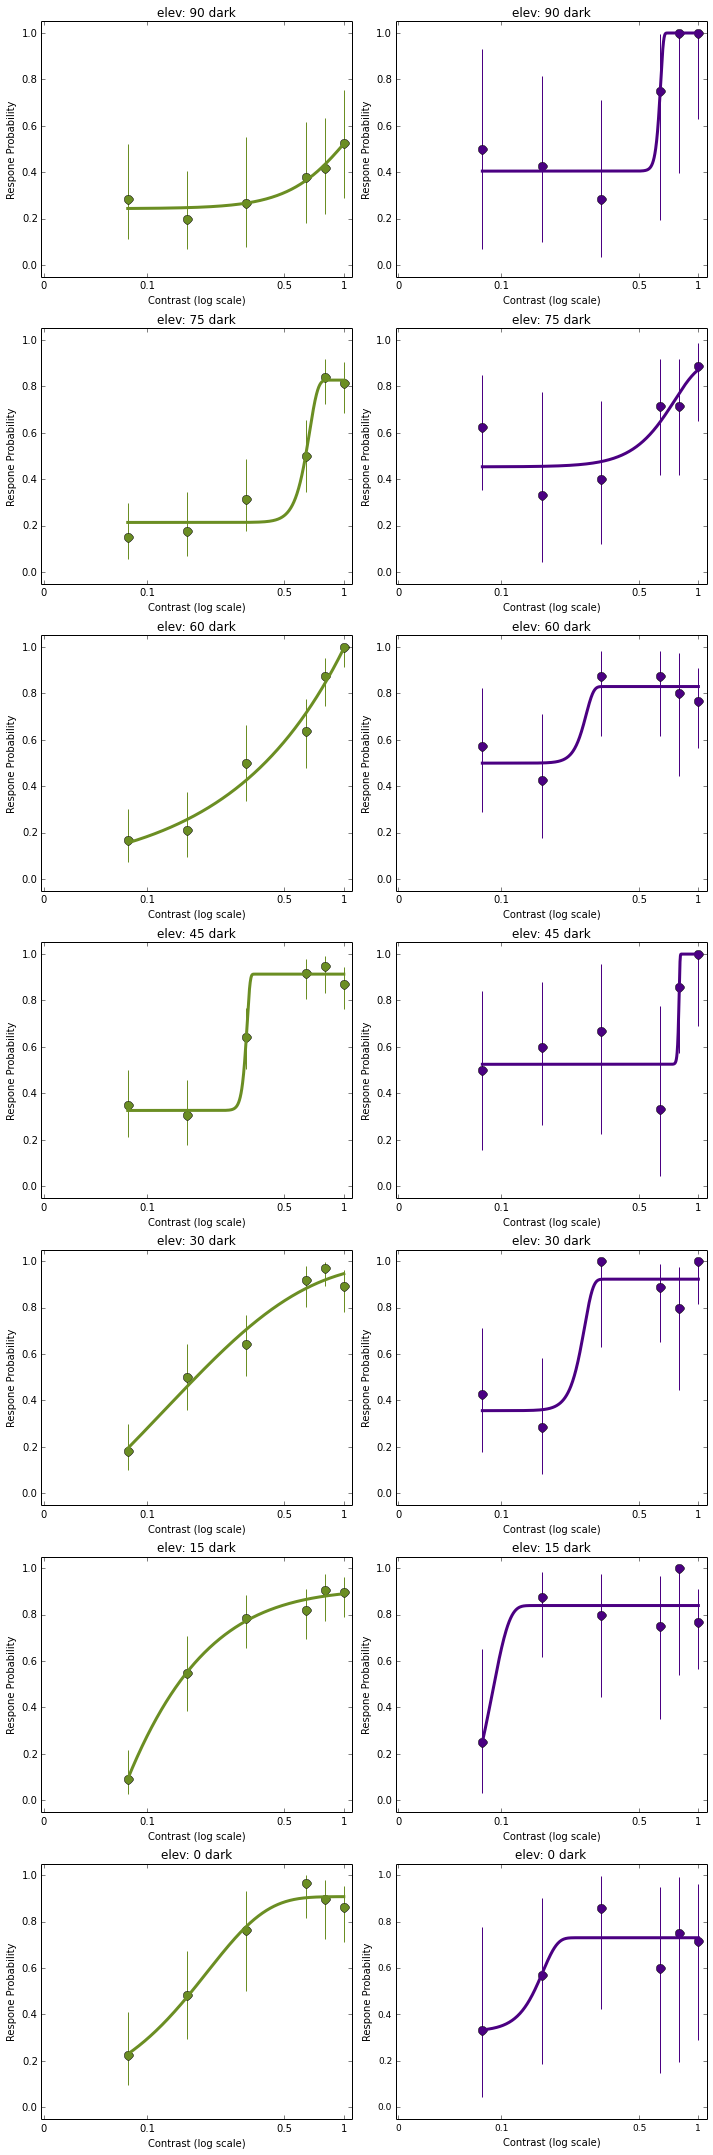

In [47]:
fig,ax = plt.subplots(7,2,figsize=(10,30))
colors = [(0,-1,0),(0,0,-1)]
for column,Color in enumerate(colors):

    loc2 = pd.concat([df[(df.PosY == 230) & (df.Color == Color)],df[(df.PosY == -240) & (df.Color == Color)],df[(df.PosY == 230) & (df.Color == Color*-1)],df[(df.PosY == -240) & (df.Color == Color*-1)]],ignore_index=True) 
    loc3 = pd.concat([df[(df.PosY == 200) & (df.Color == Color)],df[(df.PosY == -210) & (df.Color == Color)],df[(df.PosY == 200) & (df.Color == Color)],df[(df.PosY == -210) & (df.Color == Color)]],ignore_index=True) 
    loc4 = pd.concat([df[(df.PosY == 160) & (df.Color == Color)],df[(df.PosY == -180) & (df.Color == Color)],df[(df.PosY == 160) & (df.Color == Color)],df[(df.PosY == -180) & (df.Color == Color)]],ignore_index=True) 
    loc5 = pd.concat([df[(df.PosY == 120) & (df.Color == Color)],df[(df.PosY == -150) & (df.Color == Color)],df[(df.PosY == 120) & (df.Color == Color)],df[(df.PosY == -150) & (df.Color == Color)]],ignore_index=True) 
    loc6 = pd.concat([df[(df.PosY == 80) & (df.Color == Color)],df[(df.PosY == -120) & (df.Color == Color)],df[(df.PosY == 80) & (df.Color == Color)],df[(df.PosY == -120) & (df.Color == Color)],],ignore_index=True) 
    loc7 = pd.concat([df[(df.PosY == 40) & (df.Color == Color)],df[(df.PosY == -60) & (df.Color == Color)],df[(df.PosY == 40) & (df.Color == Color)],df[(df.PosY == -60) & (df.Color == Color)]],ignore_index=True) 
    loc8 =  pd.concat([df[(df.PosY == 0) & (df.Color == Color)],df[(df.PosY == 0) & (df.Color == Color*-1)]])

    #loc3 = df[((df.PosY == 200) or(df.PosY == -210))& (df.Color == Color)]
    #loc4 = df[((df.PosY == 160) or(df.PosY == -180))& (df.Color == Color)]
    #loc5 = df[((df.PosY == 120)or(df.PosY == -150)) & (df.Color == Color)]
    #loc6 = df[((df.PosY == 80) or(df.PosY == -120))& (df.Color == Color)]
    #loc7 = df[((df.PosY == 40) or(df.PosY == -60))& (df.Color == Color)]
    #loc8 = df[(df.PosY == 0) & (df.Color == Color)]

    if Color == (0,0,-1) or Color == (0,0,1):
        c = '#4B0082'
    if Color == (0,-1,0) or Color == (0,1,0):
        c = '#6B8E23'
        
    if Color[1]+Color[2] > 0:
        lum = 'bright'
    if Color[1]+Color[2] < 0:
        lum = 'dark'
        
    plotPsycho(loc2,ax[0][column],c,title='elev: 90 '+lum)
    plotPsycho(loc3,ax[1][column],c,title='elev: 75 '+lum)
    plotPsycho(loc4,ax[2][column],c,title='elev: 60 '+lum)
    plotPsycho(loc5,ax[3][column],c,title='elev: 45 '+lum)
    plotPsycho(loc6,ax[4][column],c,title='elev: 30 '+lum)
    plotPsycho(loc7,ax[5][column],c,title='elev: 15 '+lum)
    plotPsycho(loc8,ax[6][column],c,title='elev: 0 '+lum)
    
    plt.tight_layout()


green
uv


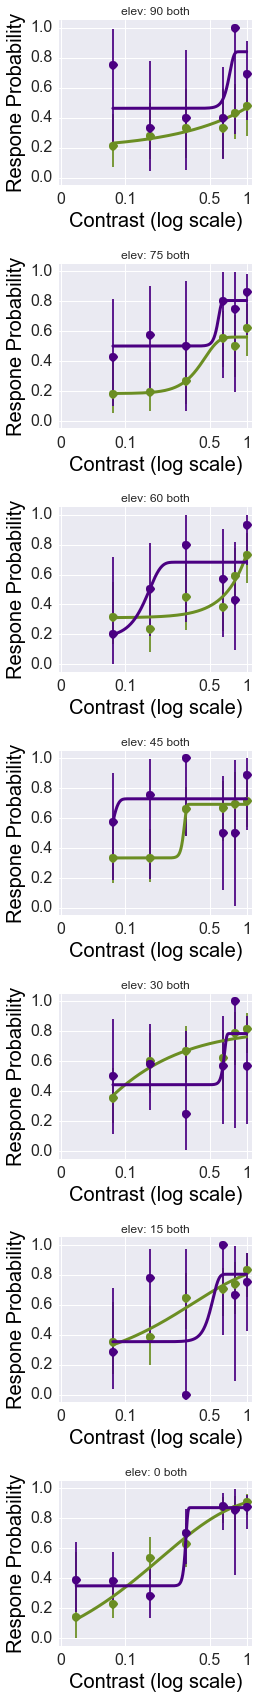

In [63]:
import seaborn as sns
fig,ax = plt.subplots(7,1,figsize=(4,24))
colors = [[(0,1,0),(0,-1,0)],[(0,0,1),(0,0,-1)]]
for column,Color in enumerate(colors):
    color = Color
    loc2 = pd.concat([df[(df.PosY == 230) & (df.Color == Color[0])],df[(df.PosY == -240) &  (df.Color == Color[1])]],ignore_index=True) 
    loc3 = pd.concat([df[(df.PosY == 200) & (df.Color == Color[0]) ],df[(df.PosY == -210) &  (df.Color == Color[1])]],ignore_index=True) 
    loc4 = pd.concat([df[(df.PosY == 160) & (df.Color == Color[0] )],df[(df.PosY == -180) & (df.Color == Color[1])]],ignore_index=True) 
    loc5 = pd.concat([df[(df.PosY == 120) & (df.Color == Color[0] )],df[(df.PosY == -150) &  (df.Color == Color[1])]],ignore_index=True) 
    loc6 = pd.concat([df[(df.PosY == 80) & (df.Color == Color[0] )],df[(df.PosY == -120) &  (df.Color == Color[1])]],ignore_index=True) 
    loc7 = pd.concat([df[(df.PosY == 40) & (df.Color == Color[0] )],df[(df.PosY == -60) &  (df.Color == Color[1])]],ignore_index=True) 
    loc8 =  pd.concat([df[(df.PosY == 0) & (df.Color == Color[0] )],df[(df.PosY == 0) & (df.Color == Color[1])]],ignore_index=True)

    if Color == [(0,0,1),(0,0,-1)]:
        print 'uv'
        c = '#4B0082'
    if Color == [(0,1,0),(0,-1,0)]:
        print 'green'
        c = '#6B8E23'
        
    lum = 'both'
        
    plotPsycho(loc2,ax[0],c,title='elev: 90 '+lum)
    plotPsycho(loc3,ax[1],c,title='elev: 75 '+lum)
    plotPsycho(loc4,ax[2],c,title='elev: 60 '+lum)
    plotPsycho(loc5,ax[3],c,title='elev: 45 '+lum)
    plotPsycho(loc6,ax[4],c,title='elev: 30 '+lum)
    plotPsycho(loc7,ax[5],c,title='elev: 15 '+lum)
    plotPsycho(loc8,ax[6],c,title='elev: 0 '+lum)
    
    for axis in ax:
        axis.tick_params(axis='both', which='major', labelsize=16)
        axis.xaxis.label.set_fontsize(20)
        axis.yaxis.label.set_fontsize(20)
    
    plt.tight_layout()
    f=plt.gcf()
    f.savefig(r'C:\Users\danield\Dropbox\allenTransfer\notebooks\behavior\elev_combined.png',format='png')#,dpi=300)

green
[0.0, 0.080000000000000002, 0.16, 0.32000000000000001, 0.64000000000000001, 0.80000000000000004, 1.0]
[{'RT_RW_mean': 0.0, 'RT_RW_std': 0.0, 'CI': (0, 0.0), 'N': 17, 'RT_all_mean': 0.0, 'RT_all_std': 0.0, 'prob': 0.0}, {'RT_RW_mean': 0.42744423567157241, 'RT_RW_std': 0.27642667526717446, 'CI': (0.014579316840302487, 0.36440916210125029), 'N': 17, 'RT_all_mean': 2.8772216624017091, 'RT_all_std': 2.0310809224360566, 'prob': 0.11764705882352941}, {'RT_RW_mean': 0.32297252100207741, 'RT_RW_std': 0.2555477588393808, 'CI': (0.086571469101434553, 0.49104587170795755), 'N': 20, 'RT_all_mean': 1.2721164547129595, 'RT_all_std': 1.9526172004656805, 'prob': 0.25}, {'RT_RW_mean': 0.49767862705742044, 'RT_RW_std': 0.19856370413496757, 'CI': (0.10728924837039694, 0.50222120126634895), 'N': 22, 'RT_all_mean': 1.6056633587249709, 'RT_all_std': 1.6628512061425862, 'prob': 0.27272727272727271}, {'RT_RW_mean': 0.59781674188414202, 'RT_RW_std': 0.24345155488516051, 'CI': (0.15877603788615383, 0.52351

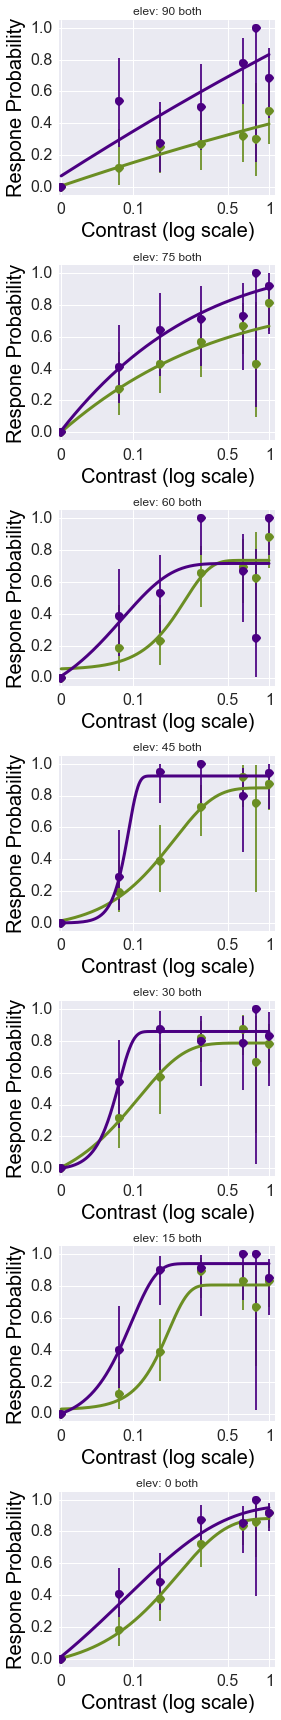

In [47]:
import seaborn as sns
fig,ax = plt.subplots(7,1,figsize=(4,24))
colors = [[(0,1,0),(0,-1,0)],[(0,0,1),(0,0,-1)]]
threshes = np.zeros((7,2))
for column,Color in enumerate(colors):
    color = Color
    loc2 = pd.concat([df[(df.PosY == 230) & (df.Color == Color[0])],df[(df.PosY == -240) &  (df.Color == Color[1])]],ignore_index=True) 
    loc3 = pd.concat([df[(df.PosY == 200) & (df.Color == Color[0]) ],df[(df.PosY == -210) &  (df.Color == Color[1])]],ignore_index=True) 
    loc4 = pd.concat([df[(df.PosY == 160) & (df.Color == Color[0] )],df[(df.PosY == -180) & (df.Color == Color[1])]],ignore_index=True) 
    loc5 = pd.concat([df[(df.PosY == 120) & (df.Color == Color[0] )],df[(df.PosY == -150) &  (df.Color == Color[1])]],ignore_index=True) 
    loc6 = pd.concat([df[(df.PosY == 80) & (df.Color == Color[0] )],df[(df.PosY == -120) &  (df.Color == Color[1])]],ignore_index=True) 
    loc7 = pd.concat([df[(df.PosY == 40) & (df.Color == Color[0] )],df[(df.PosY == -60) &  (df.Color == Color[1])]],ignore_index=True) 
    loc8 =  pd.concat([df[(df.PosY == 0) & (df.Color == Color[0] )],df[(df.PosY == 0) & (df.Color == Color[1])]],ignore_index=True)

    if Color == [(0,0,1),(0,0,-1)]:
        print 'uv'
        c = '#4B0082'
    if Color == [(0,1,0),(0,-1,0)]:
        print 'green'
        c = '#6B8E23'
        
    lum = 'both'
    a=plotPsycho(loc2,ax[0],c,title='elev: 90 '+lum)
    threshes[0][column]= a[0].get_data()[0][np.where(a[0].get_data()[1] > np.min(a[0].get_data()[1])+(np.max(a[0].get_data()[1]) - np.min(a[0].get_data()[1]))/2.)[0]][0]
    a=plotPsycho(loc3,ax[1],c,title='elev: 75 '+lum)
    threshes[1][column]= a[0].get_data()[0][np.where(a[0].get_data()[1] > np.min(a[0].get_data()[1])+(np.max(a[0].get_data()[1]) - np.min(a[0].get_data()[1]))/2.)[0]][0]
    a=plotPsycho(loc4,ax[2],c,title='elev: 60 '+lum)
    threshes[2][column]= a[0].get_data()[0][np.where(a[0].get_data()[1] > np.min(a[0].get_data()[1])+(np.max(a[0].get_data()[1]) - np.min(a[0].get_data()[1]))/2.)[0]][0]
    a=plotPsycho(loc5,ax[3],c,title='elev: 45 '+lum)
    threshes[3][column]= a[0].get_data()[0][np.where(a[0].get_data()[1] > np.min(a[0].get_data()[1])+(np.max(a[0].get_data()[1]) - np.min(a[0].get_data()[1]))/2.)[0]][0]
    a=plotPsycho(loc6,ax[4],c,title='elev: 30 '+lum)
    threshes[4][column]= a[0].get_data()[0][np.where(a[0].get_data()[1] > np.min(a[0].get_data()[1])+(np.max(a[0].get_data()[1]) - np.min(a[0].get_data()[1]))/2.)[0]][0]
    a=plotPsycho(loc7,ax[5],c,title='elev: 15 '+lum)
    threshes[5][column]= a[0].get_data()[0][np.where(a[0].get_data()[1] > np.min(a[0].get_data()[1])+(np.max(a[0].get_data()[1]) - np.min(a[0].get_data()[1]))/2.)[0]][0]
    a=plotPsycho(loc8,ax[6],c,title='elev: 0 '+lum)
    threshes[6][column]= a[0].get_data()[0][np.where(a[0].get_data()[1] > np.min(a[0].get_data()[1])+(np.max(a[0].get_data()[1]) - np.min(a[0].get_data()[1]))/2.)[0]][0]

    for axis in ax:
        axis.tick_params(axis='both', which='major', labelsize=16)
        axis.xaxis.label.set_fontsize(20)
        axis.yaxis.label.set_fontsize(20)
    
    plt.tight_layout()
    f=plt.gcf()
    #f.savefig(r'C:\Users\danield\Dropbox\allenTransfer\notebooks\behavior\elev_combined.png',format='png')#,dpi=300)

In [35]:
elevations = np.array([90,75,60,45,30,15,0])
#threshes = threshes + 1

green
uv


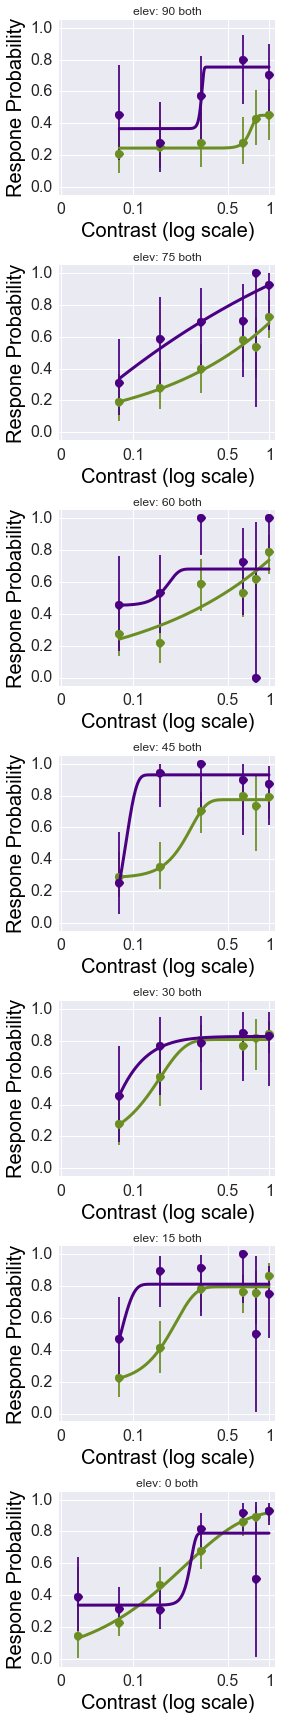

In [26]:
import seaborn as sns
fig,ax = plt.subplots(7,1,figsize=(4,24))
colors = [[(0,1,0),(0,-1,0)],[(0,0,1),(0,0,-1)]]
mx = np.zeros((7,2))
for column,Color in enumerate(colors):
    color = Color
    loc2 = pd.concat([df[(df.PosY == 230) & (df.Color == Color[0])],df[(df.PosY == -240) &  (df.Color == Color[1])]],ignore_index=True) 
    loc3 = pd.concat([df[(df.PosY == 200) & (df.Color == Color[0]) ],df[(df.PosY == -210) &  (df.Color == Color[1])]],ignore_index=True) 
    loc4 = pd.concat([df[(df.PosY == 160) & (df.Color == Color[0] )],df[(df.PosY == -180) & (df.Color == Color[1])]],ignore_index=True) 
    loc5 = pd.concat([df[(df.PosY == 120) & (df.Color == Color[0] )],df[(df.PosY == -150) &  (df.Color == Color[1])]],ignore_index=True) 
    loc6 = pd.concat([df[(df.PosY == 80) & (df.Color == Color[0] )],df[(df.PosY == -120) &  (df.Color == Color[1])]],ignore_index=True) 
    loc7 = pd.concat([df[(df.PosY == 40) & (df.Color == Color[0] )],df[(df.PosY == -60) &  (df.Color == Color[1])]],ignore_index=True) 
    loc8 =  pd.concat([df[(df.PosY == 0) & (df.Color == Color[0] )],df[(df.PosY == 0) & (df.Color == Color[1])]],ignore_index=True)

    if Color == [(0,0,1),(0,0,-1)]:
        print 'uv'
        c = '#4B0082'
    if Color == [(0,1,0),(0,-1,0)]:
        print 'green'
        c = '#6B8E23'
        
    lum = 'both'
    a=plotPsycho(loc2,ax[0],c,title='elev: 90 '+lum)
    mx[0][column]= a[0].get_data()[1][4]#a[0].get_data()[0][np.where(a[0].get_data()[1] > np.min(a[0].get_data()[1])+(np.max(a[0].get_data()[1]) - np.min(a[0].get_data()[1]))/2.)[0]][0]
    a=plotPsycho(loc3,ax[1],c,title='elev: 75 '+lum)
    mx[1][column]=  a[0].get_data()[1][4]#a[0].get_data()[0][np.where(a[0].get_data()[1] > np.min(a[0].get_data()[1])+(np.max(a[0].get_data()[1]) - np.min(a[0].get_data()[1]))/2.)[0]][0]
    a=plotPsycho(loc4,ax[2],c,title='elev: 60 '+lum)
    mx[2][column]=  a[0].get_data()[1][4]#a[0].get_data()[0][np.where(a[0].get_data()[1] > np.min(a[0].get_data()[1])+(np.max(a[0].get_data()[1]) - np.min(a[0].get_data()[1]))/2.)[0]][0]
    a=plotPsycho(loc5,ax[3],c,title='elev: 45 '+lum)
    mx[3][column]=  a[0].get_data()[1][4]#a[0].get_data()[0][np.where(a[0].get_data()[1] > np.min(a[0].get_data()[1])+(np.max(a[0].get_data()[1]) - np.min(a[0].get_data()[1]))/2.)[0]][0]
    a=plotPsycho(loc6,ax[4],c,title='elev: 30 '+lum)
    mx[4][column]=  a[0].get_data()[1][4]#a[0].get_data()[0][np.where(a[0].get_data()[1] > np.min(a[0].get_data()[1])+(np.max(a[0].get_data()[1]) - np.min(a[0].get_data()[1]))/2.)[0]][0]
    a=plotPsycho(loc7,ax[5],c,title='elev: 15 '+lum)
    mx[5][column]=  a[0].get_data()[1][4]#a[0].get_data()[0][np.where(a[0].get_data()[1] > np.min(a[0].get_data()[1])+(np.max(a[0].get_data()[1]) - np.min(a[0].get_data()[1]))/2.)[0]][0]
    a=plotPsycho(loc8,ax[6],c,title='elev: 0 '+lum)
    mx[6][column]=  a[0].get_data()[1][5]#a[0].get_data()[0][np.where(a[0].get_data()[1] > np.min(a[0].get_data()[1])+(np.max(a[0].get_data()[1]) - np.min(a[0].get_data()[1]))/2.)[0]][0]

    for axis in ax:
        axis.tick_params(axis='both', which='major', labelsize=16)
        axis.xaxis.label.set_fontsize(20)
        axis.yaxis.label.set_fontsize(20)
    
    plt.tight_layout()
    f=plt.gcf()
    #f.savefig(r'C:\Users\danield\Dropbox\allenTransfer\notebooks\behavior\elev_combined.png',format='png')#,dpi=300)

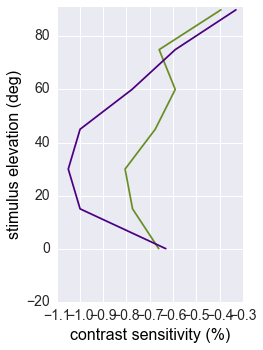

In [36]:
plt.figure(figsize=(3.77,4.97))
plt.plot(threshes[:,0],elevations,color='#6B8E23')
plt.plot(threshes[:,1],elevations,color='#4B0082')
plt.ylim(-20,91)
#plt.xlim(0,1)
plt.xlabel('contrast sensitivity (%)',size=16)
plt.ylabel('stimulus elevation (deg)',size=16)
plt.gca().tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()
f=plt.gcf()
#f.savefig(r'C:\Users\danield\Dropbox\allenTransfer\notebooks\behavior\elev_combined_summary.png',format='png')#,dpi=300)

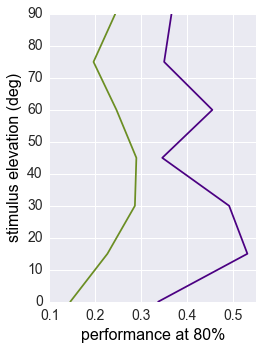

In [27]:
plt.figure(figsize=(3.77,4.97))
plt.plot(mx[:,0],elevations,color='#6B8E23')
plt.plot(mx[:,1],elevations,color='#4B0082')
#plt.ylim(-20,91)
#plt.xlim(0,1)
plt.xlabel('performance at 80%',size=16)
plt.ylabel('stimulus elevation (deg)',size=16)
plt.gca().tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()
f=plt.gcf()
#f.savefig(r'C:\Users\danield\Dropbox\allenTransfer\notebooks\behavior\elev_combined_summary.png',format='png')#,dpi=300)

In [ ]:
threshes[5][0]=-0.85
threshes[3][1]=-0.812329